In [11]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.cluster import KMeans


In [12]:
df=pd.read_csv("/content/EastWestAirlines.csv")
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [14]:
df1=df.iloc[:,1:]
df1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [15]:
df1.columns

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [16]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_df=pd.DataFrame(scaler.fit_transform(df.iloc[:,1:]),columns=['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles','Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12','Days_since_enroll', 'Award?'])
scaled_df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918
...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.547079,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120,1.303918
3995,-0.091465,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994,1.303918
3996,-0.000043,-0.186299,0.683121,-0.098242,-0.062767,0.343804,-0.375096,-0.328603,-0.362168,-1.315604,1.303918
3997,-0.185607,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,0.028531,-0.098503,-1.316088,-0.766919


In [17]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Balance            3999 non-null   float64
 1   Qual_miles         3999 non-null   float64
 2   cc1_miles          3999 non-null   float64
 3   cc2_miles          3999 non-null   float64
 4   cc3_miles          3999 non-null   float64
 5   Bonus_miles        3999 non-null   float64
 6   Bonus_trans        3999 non-null   float64
 7   Flight_miles_12mo  3999 non-null   float64
 8   Flight_trans_12    3999 non-null   float64
 9   Days_since_enroll  3999 non-null   float64
 10  Award?             3999 non-null   float64
dtypes: float64(11)
memory usage: 343.8 KB


[43989.000000000015, 35409.51662986132, 30899.24682465222, 27153.948187148504, 24884.115340434968, 21756.95528281566, 19880.82926206382, 17317.657501648544, 15961.34614346917, 14729.738063593477, 13707.753433175098, 12947.517414247803, 12429.782485547126, 11975.873141539101, 11625.863361943946, 11195.61617056695, 10838.315540679067, 10350.96212736211, 10144.780404700155, 9799.960193773493, 9519.974182630009, 9332.761615515261, 8873.053447648472, 8735.51420721589]


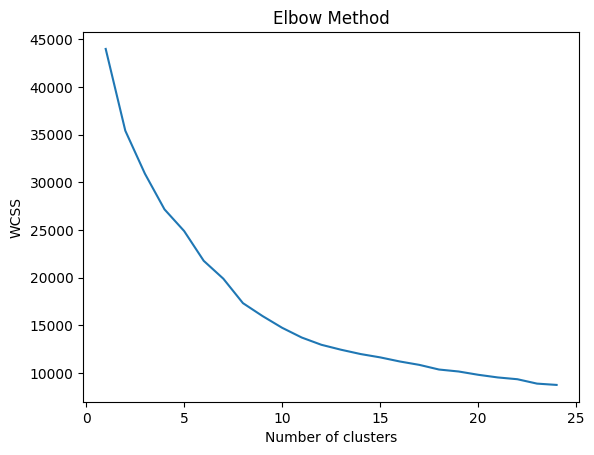

In [18]:
import warnings
warnings.filterwarnings("ignore")
wcss=[]
for i in range(1,25):
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(scaled_df)
  wcss.append(kmeans.inertia_)
print(wcss)
plt.plot(range(1, 25), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [19]:
from sklearn.cluster import KMeans
clusters_new=KMeans(3)
clusters_new.fit(scaled_df)

KMeans(n_clusters=3)

In [20]:
clusters_new.labels_

array([0, 0, 0, ..., 2, 0, 0], dtype=int32)

In [21]:
set(clusters_new.labels_)

{0, 1, 2}

In [22]:
df['clusterid_new']=clusters_new.labels_
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_new
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [23]:
df.sort_values(by="clusterid_new")

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_new
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
2558,2577,3129,0,1,1,1,0,0,0,0,2840,0,0
2560,2579,9611,0,1,1,1,2250,3,0,0,2845,1,0
2562,2581,105579,0,3,1,1,16332,12,0,0,2830,0,0
2563,2582,46654,0,1,1,1,3215,6,0,0,2830,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2674,2694,59704,0,4,2,1,57404,14,0,0,2440,0,2
1049,1060,217130,0,4,1,1,51202,20,0,0,5745,0,2
2670,2690,147862,0,4,1,1,44783,14,0,0,2426,1,2
2685,2705,62629,0,4,1,1,36986,14,0,0,2438,0,2


In [24]:
clusters_new.cluster_centers_

array([[-0.29009238, -0.06126673, -0.59736276,  0.03055393, -0.0607788 ,
        -0.50964761, -0.47765835, -0.18541838, -0.19723685, -0.19914141,
        -0.34343023],
       [ 1.20678053,  0.82616339,  0.06749543,  0.14957307, -0.06276658,
         0.58949594,  1.60289784,  3.5370169 ,  3.8034103 ,  0.28930824,
         0.91247937],
       [ 0.43692851,  0.01780092,  1.21489235, -0.08208861,  0.13268734,
         0.96715784,  0.76951536, -0.08127792, -0.09179644,  0.37022327,
         0.58455729]])

In [25]:
df.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2235.212262,44370.730307,96.720605,1.237097,1.019014,1.000388,4837.902212,7.015134,200.463718,0.625534,3707.357004,0.204501
1,1,1723.621951,195200.231707,783.207317,2.152439,1.036585,1.000000,31379.963415,26.993902,5412.000000,15.798780,4715.945122,0.810976
2,2,1601.309221,117627.582671,157.884738,3.732114,1.002385,1.038156,40499.723370,18.991256,346.263911,1.025437,4883.024642,0.652623


In [26]:
df[df['clusterid_new']==0]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_new
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
5,6,16420,0,1,1,1,0,0,0,0,6942,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,4016,3974,0,1,1,1,365,3,0,0,1397,0,0
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [27]:
df[df['clusterid_new']==1]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_new
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,1
21,22,185681,2024,1,1,1,13300,16,1800,9,6896,1,1
42,43,60313,0,1,1,1,10000,26,3250,9,7829,1,1
50,51,108137,0,1,1,1,6368,5,6368,5,6844,0,1
65,66,53914,0,3,1,1,33767,45,5550,29,6826,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3907,3930,126490,0,1,1,1,8808,15,5183,12,1566,0,1
3911,3934,55922,2273,1,1,1,8104,19,4104,16,1552,0,1
3917,3940,130748,0,4,1,1,65510,37,6349,7,1545,0,1
3934,3957,76595,0,1,1,1,10577,2,9577,1,1515,0,1


In [28]:
from sklearn.metrics import silhouette_score
score=silhouette_score(scaled_df,clusters_new.labels_,metric='euclidean')
score

0.3121716765282414

In [29]:
df1=pd.DataFrame()
df1['cluster_id']=clusters_new.labels_
df1

,cluster_id
0,0
1,0
2,0
3,0
4,2
...,...
3994,0
3995,0
3996,2
3997,0
